### importando biblioteca pandas e matplotlib abrindo arquivo.csv e removendo linhas duplicadas

In [24]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('googleplaystore.csv')


limpando_linhas_duplicadas = df.drop_duplicates()


limpando_linhas_duplicadas


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


### Criando um gráfico de barras contendo os 5 apps coim maior número de instalações

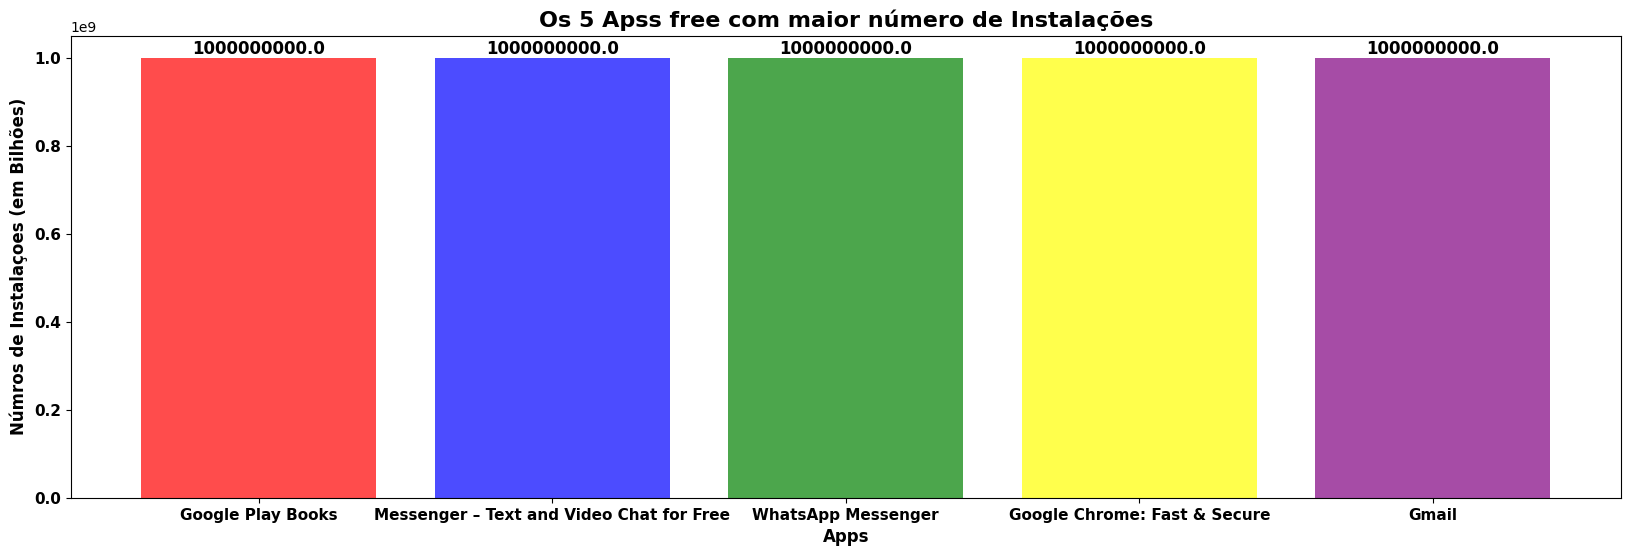

In [14]:

df['Installs'] = df['Installs'].str.replace(',', '') 
df['Installs'] = df['Installs'].str.replace('+', '')  


df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')  # Converte para int, ignorando erros

top_5_instalados = df.sort_values(by=['Installs', 'Price'], ascending=False).head(5)




cores = ['red', 'blue', 'green', 'yellow', 'purple']

plt.figure(figsize=(20, 6))

plt.bar(top_5_instalados['App'], top_5_instalados['Installs'], color=cores, alpha=0.7)

plt.title('Os 5 Apss free com maior número de Instalações', fontweight='bold', fontsize=16)

plt.ylabel('Númros de Instalaçoes (em Bilhões)', fontweight='bold', fontsize=12)
plt.xlabel('Apps', fontweight='bold', fontsize= 12)

for n, valor in enumerate(top_5_instalados['Installs']):
    plt.text(n, valor, str(valor), ha='center', va='bottom', fontweight='bold', fontsize=12)

plt.xticks(fontweight='bold', fontsize=11 )
plt.yticks(fontweight='bold', fontsize=11 )

plt.show()



### criando grafico pie chart e adionando as categorias dentro do grafico

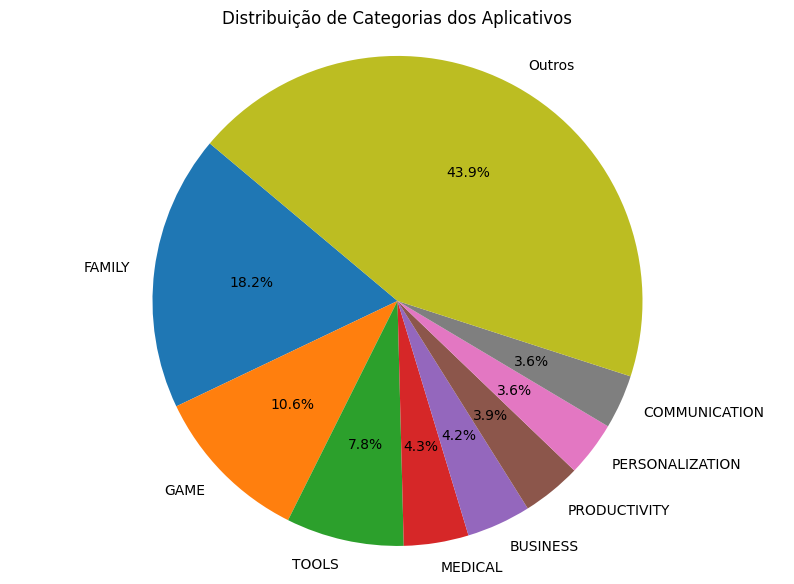

In [15]:
categoria = df['Category'].value_counts()
tp_categorias = categoria.head(8)
outros = categoria [8:].sum()

dados_grafico = pd.concat([tp_categorias, pd.Series({'Outros': outros})])

# Criar o gráfico de pizza

plt.figure(figsize=(10, 7))
plt.pie(dados_grafico, labels=dados_grafico.index, autopct='%1.1f%%', startangle=140, )
plt.title('Distribuição de Categorias dos Aplicativos')
plt.axis('equal')  

plt.show()

### Mostrando o app mais caro respectivamente com o valor 

In [16]:




df['Price'] = df['Price'].str.replace('$', '')  
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')  




max_preco = df.sort_values('Price', ascending=False).iloc[0]

app = max_preco['App']
preco_mx = max_preco['Price']


print(f"o app com maior preço é o {app} com o valor de ${preco_mx}")

o app com maior preço é o I'm Rich - Trump Edition com o valor de $400.0


### Mostrando a quantidade de Apps que estão claissificados como 'Mature +17'

In [17]:
apps_mature17 = df[df['Content Rating'] == 'Mature 17+']

apps = apps_mature17.drop_duplicates(subset='App')


apps[['App', 'Content Rating']]

quantidade_apps = len(apps)
print(f"A quantidade de apps classificados como 'Mature 17+' é de: {quantidade_apps}")

A quantidade de apps classificados como 'Mature 17+' é de: 393


### Mostrando os top 10 Apps por número de Reviews

In [18]:

df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')


df_sorted = df.sort_values('Reviews', ascending=False)

app_sem_duplicates = df_sorted.drop_duplicates(subset=['App'])
app_sem_duplicates[['App', 'Reviews']].head(10)

,App,Reviews
2544,Facebook,78158306.0
381,WhatsApp Messenger,69119316.0
2604,Instagram,66577446.0
382,Messenger – Text and Video Chat for Free,56646578.0
1879,Clash of Clans,44893888.0
4005,Clean Master- Space Cleaner & Antivirus,42916526.0
1917,Subway Surfers,27725352.0
3665,YouTube,25655305.0
7536,"Security Master - Antivirus, VPN, AppLock, Boo...",24900999.0
1878,Clash Royale,23136735.0


### Criando 2 calculos sobre o dataset e criando o grafico de cada calculo

##### As top 10 gêneros de Apss com maior frequencia

In [19]:
generos = df['Genres'].value_counts()
total_generos = generos.head(10)
total_generos

Genres
Tools              842
Entertainment      623
Education          549
Medical            463
Business           460
Productivity       424
Sports             398
Personalization    392
Communication      387
Lifestyle          381
Name: count, dtype: int64

##### Histograma dos 10 gêneros de apps, mostrando a tendencia

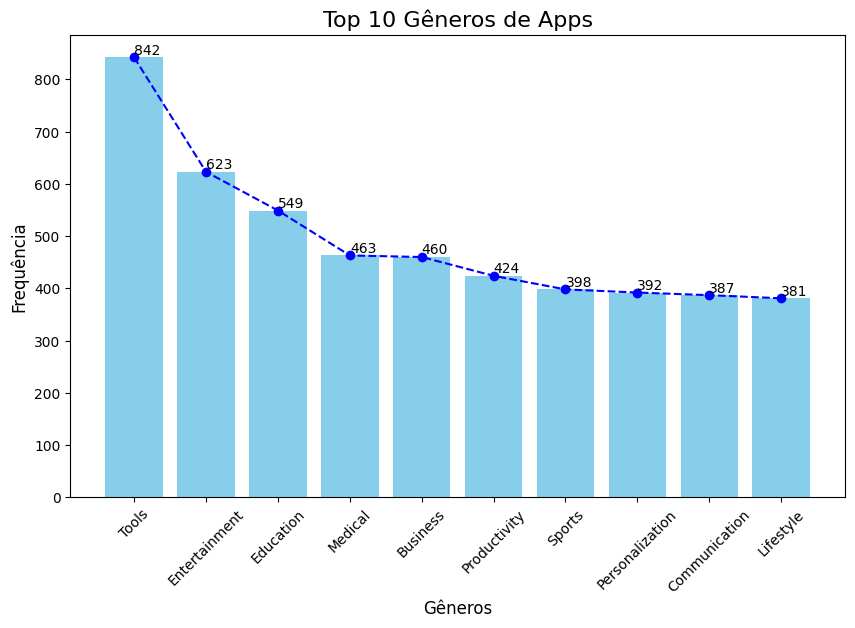

In [20]:
plt.figure(figsize=(10, 6))
plt.bar(total_generos.index, total_generos.values, color='skyblue')

# Adicionar rótulos e título
plt.xlabel('Gêneros', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.title('Top 10 Gêneros de Apps', fontsize=16)

plt.plot(total_generos.index, total_generos.values, color='blue', marker='o', linestyle='--')

# Mostrar os valores em cima das barras
for index, value in enumerate(total_generos):
    plt.text(index, value, str(value), va='bottom')


plt.xticks(rotation=45)

plt.show()


### mostrando Os Jogos com maiores Reviews e criando um gráfico de linhas para representar

In [25]:

df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')
df = df.drop_duplicates(subset=['App'])


category = df[df['Category'] == 'GAME']


games_reviwes = category.sort_values(['Reviews', 'Rating'], ascending=[False, False]).head(5)


games_reviwes[['App', 'Reviews']]




,App,Reviews
1670,Clash of Clans,44891723.0
1654,Subway Surfers,27722264.0
1660,Clash Royale,23133508.0
1655,Candy Crush Saga,22426677.0
1722,My Talking Tom,14891223.0


In [ ]:
import matplotlib.ticker as ticker
plt.figure(figsize=(10, 6))

# Gráfico de linhas para o número de avaliações
plt.plot(games_reviwes ['App'], games_reviwes['Reviews'], marker='o', color='b', linestyle='-', label='Número de Reviews')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))



# Adicionar rótulos e título
plt.xlabel('Apps', fontweight='bold')
plt.ylabel('Número de Avaliações(Reviews em Milhões)', fontweight='bold')
plt.title('Top 5 Jogos com Mais Avaliações(Reviews)', fontweight='bold')


plt.legend()
plt.grid(True)




plt.show()